<a href="https://colab.research.google.com/github/JuniorHZ19/HerramientasIA/blob/main/RoopertaV5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@markdown # **1) Clone roop repo and install dependencies**

!git clone https://github.com/based9based/roop
%cd roop
!pip install -r requirements.txt

Cloning into 'roop'...
remote: Enumerating objects: 1586, done.
remote: Total 1586 (delta 0), reused 0 (delta 0), pack-reused 1586
Receiving objects: 100% (1586/1586), 97.40 MiB | 11.93 MiB/s, done.
Resolving deltas: 100% (988/988), done.
/content/roop
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
Ignoring tkinterdnd2-universal: markers 'sys_platform == "darwin" and platform_machine == "arm64"' don't match your environment
Ignoring onnxruntime: markers 'python_version != "3.9" and sys_platform == "darwin" and platform_machine != "arm64"' don't match your environment
Ignoring onnxruntime-coreml: markers 'python_version == "3.9" and sys_platform == "darwin" and platform_machine != "arm64"' don't match your environment
Ignoring onnxruntime-silicon: markers 'sys_platform == "darwin" and platform_machine == "arm64"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:

#@markdown # **2) download mode**

!pip install gdown

!gdown --id 1gVbVd0WEfNIweGtZdPmSWFhwqMOhzk4w
!7z e RoopModel.zip

# Ruta al archivo ZIP que deseas descomprimir
archivo_zip = '/content/roop/RoopModel.zip'

import zipfile
# Directorio de destino para la descompresión
directorio_destino = '/content/roop'  #


with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    # Descomprime los archivos en el directorio de destino
    zip_ref.extractall(directorio_destino)








/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1gVbVd0WEfNIweGtZdPmSWFhwqMOhzk4w
To: /content/roop/RoopModel.zip
100% 514M/514M [00:06<00:00, 74.9MB/s]

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 514369332 bytes (491 MiB)

Extracting archive: RoopModel.zip
--
Path = RoopModel.zip
Type = zip
Physical Size = 514369332

  0%      3% - inswapper_128.onnx                           7% - inswapper_128.onnx                          11% - inswap

In [3]:
#@markdown # **3) Montar Driver**
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#@markdown # **4.A)Agregar Nueva Data SOURCE**

import os
from google.colab import files

ruta_carpeta = '/content/roop/data_src'

if not os.path.exists(ruta_carpeta):
        os.makedirs(ruta_carpeta)
        print(f'Carpeta creada en: {ruta_carpeta}')
else:
        print(f'La carpeta ya existe en: {ruta_carpeta}')

# Cargar una imagen desde tu computadora
uploaded = files.upload()

# Mueve el archivo cargado a la carpeta de destino
for filename in uploaded.keys():
    ruta_origen = filename
    ruta_destino = os.path.join(ruta_carpeta, filename)
    os.rename(ruta_origen, ruta_destino)
    print(f'Archivo movido a: {ruta_destino}')




Carpeta creada en: /content/roop/data_src


Saving marisel.jfif to marisel.jfif
Archivo movido a: /content/roop/data_src/marisel.jfif


In [38]:
#@markdown # 4.B)AGREGAR VIDEO DESTINO *

ruta_dst="/content/roop/data_dst"

if not os.path.exists(ruta_dst):
        os.makedirs(ruta_dst)
        print(f'Carpeta creada en: {ruta_dst}')
else:
        print(f'La carpeta ya existe en: {ruta_dst}')

# Cargar una imagen desde tu computadora
uploaded = files.upload()

# Mueve el archivo cargado a la carpeta de destino
for filename in uploaded.keys():
    ruta_origen = filename
    ruta_destino = os.path.join(ruta_dst, filename)
    os.rename(ruta_origen, ruta_destino)
    print(f'Video movido a: {ruta_destino}')


La carpeta ya existe en: /content/roop/data_dst


KeyboardInterrupt: ignored

In [9]:
#@markdown # **5.A)SELECIONA SOURCE**
from IPython.display import display, Image
import ipywidgets as widgets
import os

# Ruta de la carpeta de imágenes
carpeta_imagenes = '/content/roop/data_src'

# Obtén la lista de archivos de la carpeta de imágenes
lista_archivos = os.listdir(carpeta_imagenes)
lista_imagenes = [archivo for archivo in lista_archivos if archivo.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]

# Crea un widget Dropdown con la lista de imágenes
dropdown_imagenes = widgets.Dropdown(
    options=lista_imagenes,
    description='Selecciona una imagen:'
)

# Función para mostrar la imagen seleccionada sin reescalado
def mostrar_imagen(imagen):
    global ruta_completa_src
    ruta_completa_src = os.path.join(carpeta_imagenes, imagen)
    display(Image(filename=ruta_completa_src))

# Vincula la función de mostrar_imagen al cambio en el Dropdown
widgets.interactive(mostrar_imagen, imagen=dropdown_imagenes)


interactive(children=(Dropdown(description='Selecciona una imagen:', options=('marisel.jpg',), value='marisel.…

Dropdown(options=('Selecciona un video:', 'rensintels.mp4'), value='Selecciona un video:')

Entraste a un video .mp4


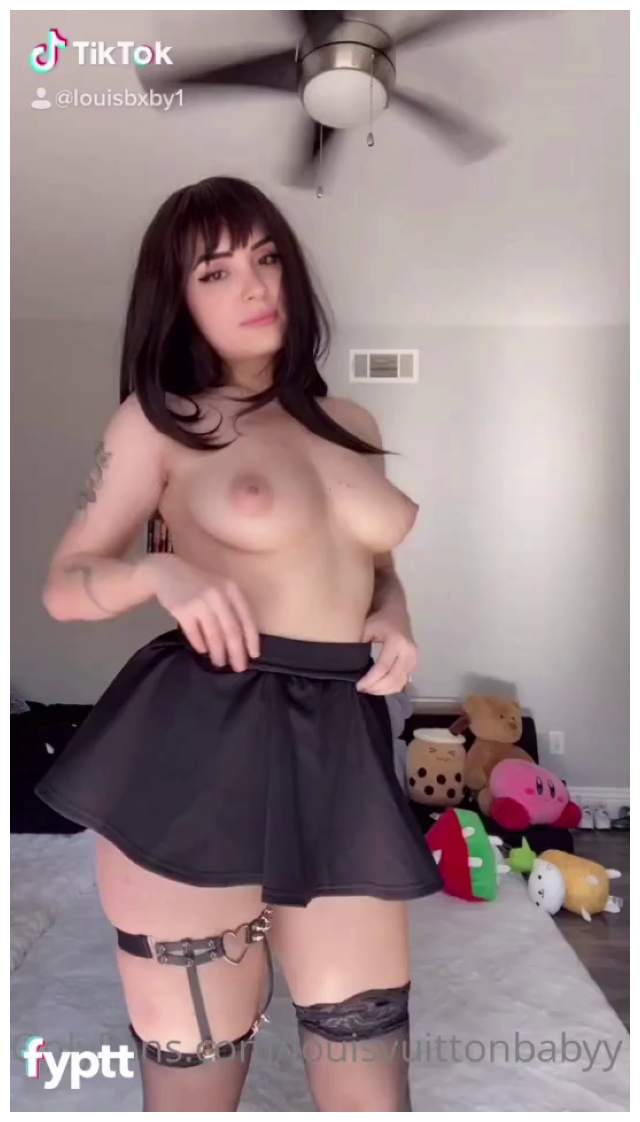

In [37]:
import os
import cv2
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

carpeta_dst = '/content/roop/data_dst'

# Obtén la lista de archivos de la carpeta de imágenes
lista_archivos = os.listdir(carpeta_dst)
lista_videos = [archivo for archivo in lista_archivos if archivo.lower().endswith(('.jpg', 'png', '.mp4', '.avi', '.mkv', '.mov'))]

# Crea un widget Dropdown con la lista de imágenes
dropdown_videos = widgets.Dropdown(
    options=["Selecciona un video:"] + lista_videos,
)

ruta_seleccionada_dst = None

# Función para mostrar el video seleccionado sin reescalado
def seleccionar_video(change):
    global ruta_seleccionada_dst
    ruta_seleccionada_dst = os.path.join(carpeta_dst, change.new)

    if ruta_seleccionada_dst is not None and ruta_seleccionada_dst.lower().endswith(".mp4"):

        cap = cv2.VideoCapture(ruta_seleccionada_dst)
        ret, frame = cap.read()

        # Muestra la imagen en el cuadro de salida usando matplotlib
        plt.figure(figsize=(8, 18))
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')  # Oculta los ejes
        plt.show()

# Vincula la función de almacenar la ruta al cambio en el Dropdown
display(dropdown_videos)
dropdown_videos.observe(seleccionar_video, names='value')

In [32]:


#@markdown # **6) Swapped!!!"
import os
drive_mounted = True
NombreFinalSwapped = 'verinica'#@param{type: "string"}
many_faces = False # @param {type:"boolean"}
face_enhancer=False # @param {type:"boolean"}

if many_faces:
  many_faces= '--many_faces'
else: many_faces=''

if face_enhancer:
  face_enhancer= 'face_enhancer'
else: face_enhancer=''

ruta_output="/content/roop/output"



if not os.path.exists(ruta_output):
        os.makedirs(ruta_output)
        print(f'Carpeta creada en: {ruta_output}')
else:
        print(f'La carpeta ya existe en: {ruta_output}')

dst=ruta_seleccionada_dst
src=ruta_completa_src

!python /content/roop/run.py --target {ruta_seleccionada_dst} {many_faces} --source {ruta_completa_src} -o '/content/roop/output/'{NombreFinalSwapped}'.mp4' --execution-provider cuda --frame-processor  face_swapper {face_enhancer}

# Ejecuta el comando (puedes comentar esta línea si solo deseas imprimir el comando)


Carpeta creada en: /content/roop/output
Downloading: 529MB [00:05, 95.4MB/s]              
download_path: /root/.insightface/models/buffalo_l
100% 281857/281857 [00:05<00:00, 52102.47KB/s]
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'device_id': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_alloc': '0', 'gpu_external_free': '0', 'gpu_external_empty_cache': '0', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'cudnn_conv1d_pad_to_nc1d': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'do_copy_in_default_stream': '1', 'enable_cuda_graph': '0', 'cudnn_conv_use_max_workspace': '1', 'tunable_op_enable': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_tuning_enable': '0'}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvide

In [ ]:
#@markdown # 7) Comprimir videos de output!!!"

import shutil
import zipfile

from PIL import Image
import os



Nombre_Rar = ''#@param{type: "string"}
# Ruta de la carpeta de salida para videos
ruta_carpeta_videos = '/content/roop/output'




# Ruta de la carpeta que deseas comprimir

shutil.make_archive(Nombre_Rar, 'zip', ruta_carpeta_videos)




In [ ]:
#@markdown # **8)Descargar Zip de outpus a drive**
#@markdown Se pasara el archivo a nuestro drive
import os

from google.colab import files
from google.colab import drive, files

shutil.move(f'/content/roop/{Nombre_Rar}.zip', f'/content/drive/MyDrive')
print(f"MOviendo {Nombre_Rar} el archivo a la carpeta data_src en tu Drive")